In [ ]:

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# Change the path to point to your actual data file
read_df = pd.read_csv('/content/drive/My Drive/shipments_values_(1).csv')

print(read_df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   NUMBER_OF_PICKUPS  NUMBER_OF_DROPS           PICKUP_DATE  \
0                  1                1  2023-01-13T00:00:00Z   
1                  1                1  2023-01-28T00:00:00Z   
2                  1                1  2023-01-29T00:00:00Z   
3                  1                1  2023-01-28T00:00:00Z   
4                  1                1  2023-01-25T00:00:00Z   

        ORDER_BOOK_DATE  SHIPMENT_AMOUNT  MILEAGE  HAZMAT  SERVICE_LEVEL  \
0  2022-12-30T00:00:00Z         11655.90     3132     1.0            1.0   
1  2023-01-28T00:00:00Z         10646.70     3033     1.0            3.0   
2  2023-01-25T00:00:00Z         10093.91     3033     1.0            3.0   
3  2023-01-24T00:00:00Z          9904.43     2688     1.0            1.0   
4  2023-01-25T00:00:00Z          9570.57     3033     1.0            3.0   

   WEIGHT  LINEAR_FEET EQUIP_TYPE O

In [ ]:
# To find the highest shipment amount for each unique route from Origin_Location to Destination_Location,
# we'll sort the data by these locations and the 'SHIPMENT_AMOUNT', then drop duplicates keeping the one with the highest amount.

# Sorting by 'ORIGIN_LOCATION', 'DESTINATION_LOCATION', and 'SHIPMENT_AMOUNT' descending
sorted_data = read_df.sort_values(by=['ORIGIN_LOCATION', 'DESTINATION_LOCATION', 'SHIPMENT_AMOUNT'], ascending=[True, True, False])

# Dropping duplicate routes, keeping the first one which is the highest due to our sorting
highest_shipment_per_route = sorted_data.drop_duplicates(subset=['ORIGIN_LOCATION', 'DESTINATION_LOCATION'], keep='first')

# Showing the results
highest_shipment_per_route[['ORIGIN_LOCATION', 'DESTINATION_LOCATION', 'SHIPMENT_AMOUNT']].head(10)


,ORIGIN_LOCATION,DESTINATION_LOCATION,SHIPMENT_AMOUNT
158,AL_MOB,AL_MOB,5936.00
56,AL_MOB,CA_LAX,7308.69
12,AL_MOB,FL_LAK,8453.92
67,AL_MOB,FL_MIA,7046.70
151,AL_MOB,GA_ATL,5943.83
8,AL_MOB,GA_SAV,8846.48
3542,AL_MOB,IL_JOL,1593.47
128,AL_MOB,IL_RFD,6174.22
266,AL_MOB,IN_IND,5083.87
84,AL_MOB,MO_KAN,6698.11


In [ ]:
# To find the highest shipment amount for each route based on weight and mileage,

sorted_by_weight_mileage = read_df.sort_values(by=['ORIGIN_LOCATION', 'DESTINATION_LOCATION', 'WEIGHT', 'MILEAGE', 'SHIPMENT_AMOUNT'], ascending=[True, True, False, False, False])

# Dropping duplicate routes, keeping the first entry which has the highest weight, mileage, and shipment amount due to the sorting
highest_shipment_per_route_weight_mileage = sorted_by_weight_mileage.drop_duplicates(subset=['ORIGIN_LOCATION', 'DESTINATION_LOCATION'], keep='first')

# Showing the results, focusing on the route, weight, mileage, and shipment amount
result=highest_shipment_per_route_weight_mileage[['ORIGIN_LOCATION', 'DESTINATION_LOCATION', 'WEIGHT', 'MILEAGE', 'SHIPMENT_AMOUNT']].head(10)
print(result.sort_values(by=['SHIPMENT_AMOUNT'], ascending=[False]).head(10))


     ORIGIN_LOCATION DESTINATION_LOCATION  WEIGHT  MILEAGE  SHIPMENT_AMOUNT
1833          AL_MOB               FL_MIA   44353     1121          2400.95
1778          AL_MOB               FL_LAK   44353     1022          2375.18
3706          AL_MOB               GA_ATL   42502      630          1611.73
3732          AL_MOB               GA_SAV   44353      812          1526.43
4031          AL_MOB               AL_MOB   52571      581          1440.31
6588          AL_MOB               IL_RFD   41902      454           983.26
7164          AL_MOB               IL_JOL   41000      407           796.19
8687          AL_MOB               MO_KAN   72456      265           445.51
8949          AL_MOB               IN_IND   50378      188           434.20
9274          AL_MOB               CA_LAX   85944      247           429.31


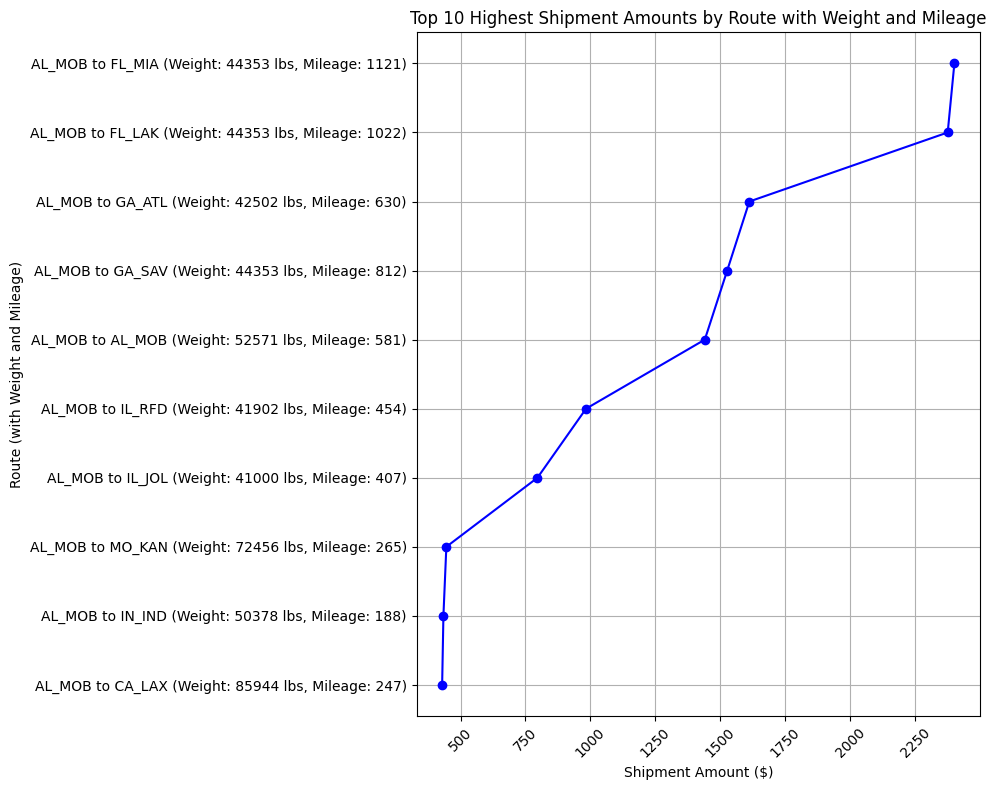

In [ ]:

import matplotlib as plt
import matplotlib.pyplot as plt
highest_shipment_per_route_weight_mileage_service_top10 = result.nlargest(10, 'SHIPMENT_AMOUNT')

# Creating a new column 'Route_Weight_Mileage' for y-axis labels
highest_shipment_per_route_weight_mileage_service_top10['Route_Weight_Mileage'] = highest_shipment_per_route_weight_mileage_service_top10.apply(
    lambda x: f"{x['ORIGIN_LOCATION']} to {x['DESTINATION_LOCATION']} (Weight: {x['WEIGHT']} lbs, Mileage: {x['MILEAGE']})", axis=1)

# Sorting the top 10 results by 'SHIPMENT_AMOUNT' in ascending order for plotting purposes
highest_shipment_per_route_weight_mileage_service_top10_sorted = highest_shipment_per_route_weight_mileage_service_top10.sort_values(by='SHIPMENT_AMOUNT', ascending=True)

#Plotting
plt.figure(figsize=(10, 8))
plt.plot(highest_shipment_per_route_weight_mileage_service_top10_sorted['SHIPMENT_AMOUNT'], highest_shipment_per_route_weight_mileage_service_top10_sorted['Route_Weight_Mileage'], marker='o', linestyle='-', color='b')
plt.title('Top 10 Highest Shipment Amounts by Route with Weight and Mileage')
plt.xlabel('Shipment Amount ($)')
plt.ylabel('Route (with Weight and Mileage)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-9-71b44422a7f4>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = read_df.corr()


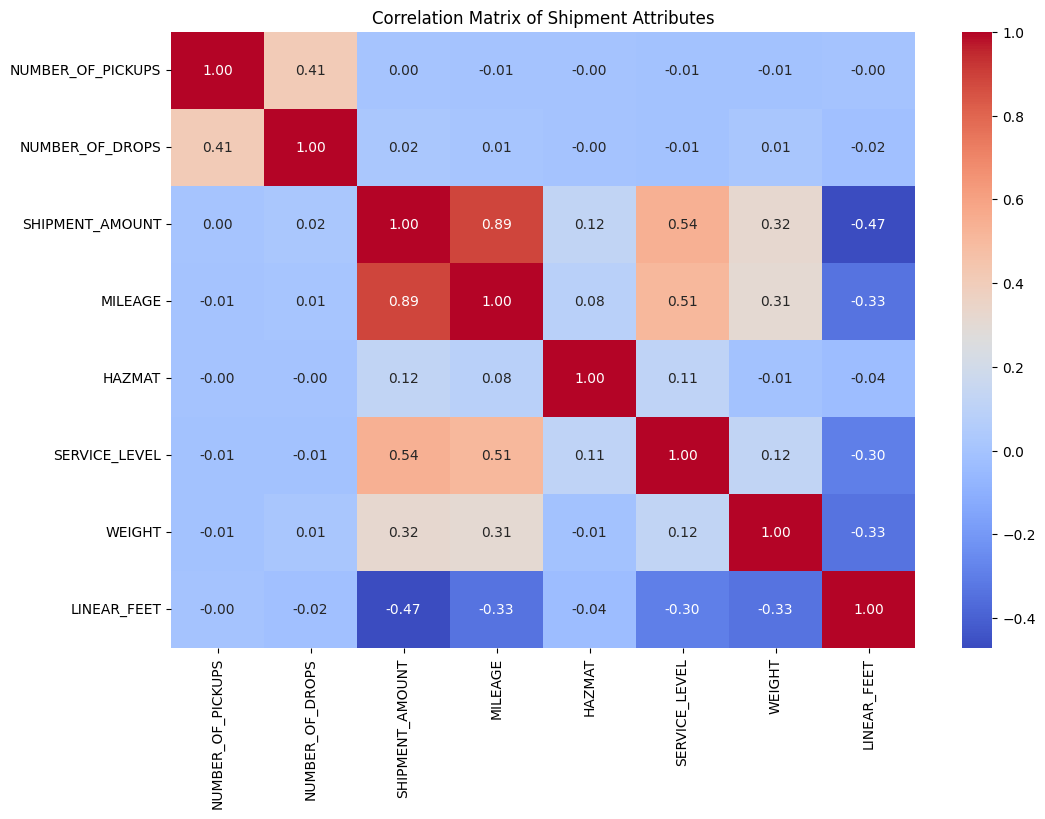

(       NUMBER_OF_PICKUPS  NUMBER_OF_DROPS  SHIPMENT_AMOUNT      MILEAGE  \
 count        9966.000000      9966.000000      9966.000000  9966.000000   
 mean            1.002007         1.002408      1614.348875   589.247642   
 std             0.044755         0.049017      1300.490073   527.317399   
 min             1.000000         1.000000       131.350000     1.000000   
 25%             1.000000         1.000000       757.365000   228.000000   
 50%             1.000000         1.000000      1241.195000   461.000000   
 75%             1.000000         1.000000      2003.582500   764.000000   
 max             2.000000         2.000000     11655.900000  3132.000000   
 
             HAZMAT  SERVICE_LEVEL        WEIGHT  LINEAR_FEET  
 count  9925.000000    9917.000000   9966.000000  9966.000000  
 mean      0.002317       1.052234  22796.623821    51.072848  
 std       0.048086       0.318981  15422.576609     1.687982  
 min       0.000000       1.000000      0.000000    48.000

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# a summary statistics of the numerical columns
summary_statistics = read_df.describe()

# correlation matrix to understand the relationship between SHIPMENT_AMOUNT and other features
correlation_matrix = read_df.corr()

# Plot heatmap of the correlation matrix for better visualization
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Shipment Attributes')
plt.show()

summary_statistics, correlation_matrix['SHIPMENT_AMOUNT'].sort_values(ascending=False)


In [ ]:
from scipy.stats import f_oneway

# Since we want to analyze the impact of categorical variables on shipment rates, we'll use ANOVA (Analysis of Variance)
# This will help us determine if there are statistically significant differences in shipment rates based on categories like EQUIP_TYPE, ORIGIN_LOCATION, and DESTINATION_LOCATION

# First, preparing a list of unique values for each categorical variable
equip_types = read_df['EQUIP_TYPE'].unique()
origin_locations = read_df['ORIGIN_LOCATION'].unique()
destination_locations = read_df['DESTINATION_LOCATION'].unique()

# Function to perform ANOVA for a given categorical variable and return the F-statistic and p-value
def perform_anova(df, categorical_variable):
    groups = [df['SHIPMENT_AMOUNT'][df[categorical_variable] == category] for category in df[categorical_variable].unique()]
    f_stat, p_value = f_oneway(*groups)
    return f_stat, p_value

# Perform ANOVA for each categorical variable
anova_equip_type = perform_anova(read_df, 'EQUIP_TYPE')
anova_origin_location = perform_anova(read_df, 'ORIGIN_LOCATION')
anova_destination_location = perform_anova(read_df, 'DESTINATION_LOCATION')

print('F1 Score and P Vale for EQUIP_TYPE Feature {}'.format(anova_equip_type))
print('F1 Score and P Vale for Origin Location Feature {}'.format(anova_origin_location))
print('F1 Score and P Vale for Destination Location Feature {}'.format(anova_destination_location))


F1 Score and P Vale for EQUIP_TYPE Feature (2842.553771568266, 0.0)
F1 Score and P Vale for Origin Location Feature (102.96248675292298, 4.21630712012819e-279)
F1 Score and P Vale for Destination Location Feature (19.687604061140437, 1.839183800445921e-56)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd


# Convert dates to datetime objects and extract useful features
# Data preprocessing
read_df['PICKUP_DATE'] = pd.to_datetime(read_df['PICKUP_DATE'])
read_df['ORDER_BOOK_DATE'] = pd.to_datetime(read_df['ORDER_BOOK_DATE'])
read_df['PICKUP_DAY'] = read_df['PICKUP_DATE'].dt.dayofweek
read_df['ORDER_BOOK_DAY'] = read_df['ORDER_BOOK_DATE'].dt.dayofweek

# Fill missing values for HAZMAT and SERVICE_LEVEL columns
read_df['HAZMAT'].fillna(0, inplace=True)
read_df['SERVICE_LEVEL'].fillna(1, inplace=True)
read_df['ORIGIN_STATE'] = read_df['ORIGIN_LOCATION'].apply(lambda x: x.split('_')[0])
read_df['DESTINATION_STATE'] = read_df['DESTINATION_LOCATION'].apply(lambda x: x.split('_')[0])
read_df.drop(['PICKUP_DATE', 'ORDER_BOOK_DATE', 'ORIGIN_LOCATION', 'DESTINATION_LOCATION'], axis=1, inplace=True)

X = read_df.drop('SHIPMENT_AMOUNT', axis=1)
y = read_df['SHIPMENT_AMOUNT']

numerical_cols = ['NUMBER_OF_PICKUPS', 'NUMBER_OF_DROPS', 'MILEAGE', 'WEIGHT', 'LINEAR_FEET', 'PICKUP_DAY', 'ORDER_BOOK_DAY']
categorical_cols = ['HAZMAT', 'SERVICE_LEVEL', 'EQUIP_TYPE', 'ORIGIN_STATE', 'DESTINATION_STATE']

numerical_transformer = SimpleImputer(strategy='constant')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

model = LinearRegression()

my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

my_pipeline.fit(X_train, y_train)
preds = my_pipeline.predict(X_test)
score = mean_squared_error(y_test, preds, squared=False)

# Get feature names after one-hot encoding
encoder = my_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
all_feature_names = numerical_cols + encoded_feature_names.tolist()

# Get coefficients
coefficients = my_pipeline.named_steps['model'].coef_


r_squared = my_pipeline.score(X_test, y_test)
print("R^2:", r_squared)

# Map encoded feature names to a more interpretable format
feature_importances = pd.Series(np.abs(coefficients), index=all_feature_names).sort_values(ascending=False)

print("RMSE:", score)
print("Top 10 Feature Importances:")
print(feature_importances[:10])

R^2: 0.8463208851833015
RMSE: 501.03191196126255
Top 10 Feature Importances:
HAZMAT_0.0              647.686333
HAZMAT_1.0              647.686333
DESTINATION_STATE_VA    542.798861
SERVICE_LEVEL_3.0       351.685271
SERVICE_LEVEL_1.0       351.685271
ORIGIN_STATE_SC         330.441478
DESTINATION_STATE_SC    306.897603
NUMBER_OF_DROPS         246.790705
DESTINATION_STATE_IL    195.305534
ORIGIN_STATE_TX         141.084415
dtype: float64


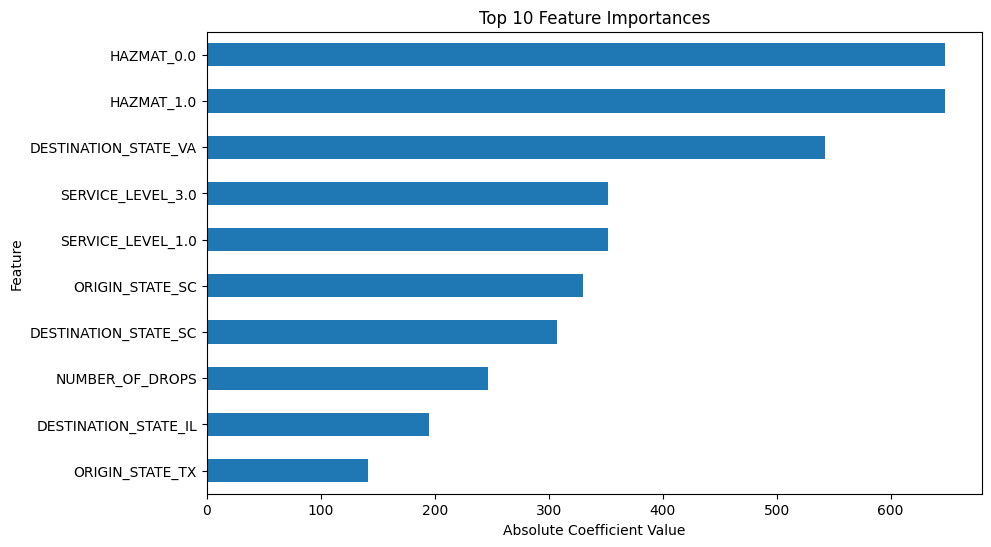

In [ ]:
plt.figure(figsize=(10, 6))
feature_importances[:10].plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [ ]:
#THANK YOU FOR READING MY CODE 🧑‍💻 :)